# HASHING
## Hasing the basics
### Operations & application
- Supported	operation
     - insert/ delete/ lookup
     - O(1)
- Application 
     - De-duplication
     - Two SUM problem, x+y=t. whether a list contain x,y
     
     
### Implementation
- Resolving	collisions
    - linked list
    - open addressing (only one object per bucket)
         - linear probing/ double hashing
- Quick and Dirity Hash Function
` object <hash code>> integers <compression(mod)>> buckets`
    - num of buckets
         - prime/ not close to 2**/ 10** 
- The Load of a Hash Table
    - num of objects in hash table/ num of buckets of hash table 

  
## Universal Hash Functions
### Moviation
- The Load of a Hash Table
    - num of objects in hash table/ num of buckets of hash table 
    - open addressing, Load >> 1
- Pathological Data Sets
     - solution: SHA-2/ universial hasing 
     
     
### Core
- 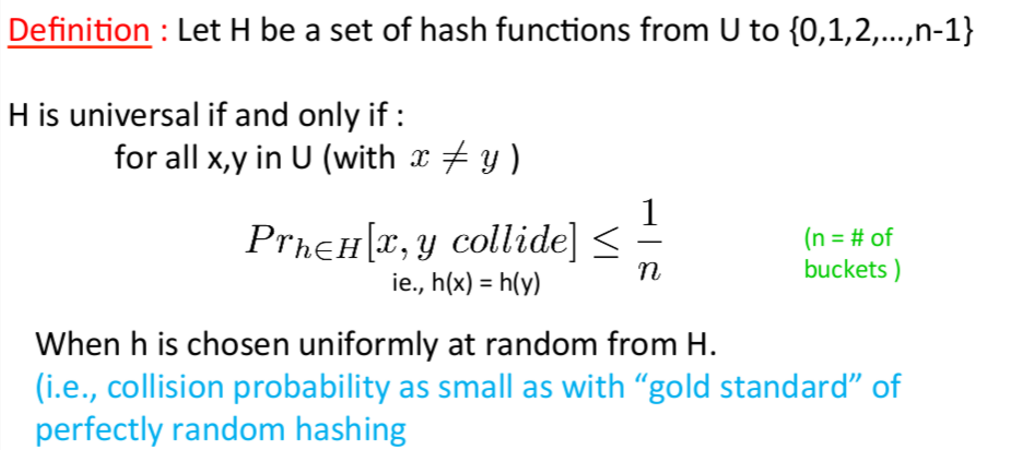

- Example: Hashing IP Addresses	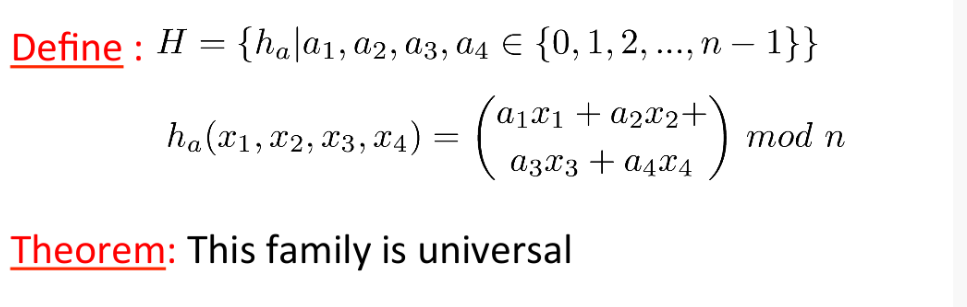
- Chaining: Constant-Time Guarantee
     - (prove using Expectation)  
- Open addressing(Optional)


## Bloom Filter
### Supported Operations
- insert/ lookup
- _no flase negtive_
- Compare to HT
     - space efficient
     - small false positive / __No__ deletion
     
     
### Usage
- spelling checking
- network router (limited space)


### Ingredients
- array of _n_ bits ( average ___b___ bits per object)
- _k_ hash functions


### Heuristic Analysis(Prove)
- trade-off between space and error
- _with b = 8, choose k = 5 or 6 , error probability only approximately 2%._



# Programming Assignment 6 - Question 1
1/1 point (graded)
Download the following text file: [algo1-programming_prob-2sum.txt](https://s3-us-west-1.amazonaws.com/prod-edx/Algo1/Files/algo1-programming_prob-2sum.txt)

The goal of this problem is to implement a variant of the 2-SUM algorithm (covered in the Week 6 lecture on hash table applications).

The file contains 1 million integers, both positive and negative (there might be some repetitions!).This is your array of integers, with the  row of the file specifying the  entry of the array.

Your task is to compute the number of target values  in the interval [-10000,10000] (inclusive) such that there are distinct numbers  in the input file that satisfy . (NOTE: ensuring distinctness requires a one-line addition to the algorithm from lecture.)

Write your numeric answer (an integer between 0 and 20001) in the space provided.

OPTIONAL CHALLENGE: If this problem is too easy for you, try implementing your own hash table for it. For example, you could compare performance under the chaining and open addressing approaches to resolving collisions.

```python
from bisect import bisect_left, bisect_right

class TwoSumFinder:
    def __init__(self, input_file=None):
        self._array = []
        numbers = set()
        self._target_values = 0
        if input_file is None:
            for number in input().split():
                numbers.add(int(number))
        else:
            with open(input_file) as file:
                for number in file.read().splitlines():
                    numbers.add(int(number))
        self._array = sorted(numbers)

    def compute_values(self):
        myset = set()
        target_values = set()
        for num in self._array:
            if num in myset:
                continue
            low = bisect_left(self._array, -10000 - num)
            high = bisect_right(self._array, 10000 - num)
#             print(high-low)
            for pair_num in self._array[low:high]:
                if pair_num != num:
                    target_values.add(num + pair_num)
        return len(target_values)

if __name__ == "__main__":
    two_sum_finder = TwoSumFinder("assignment_6-1 (2).txt")
    target_values = two_sum_finder.compute_values()
    print(target_values)
```

# Programming Assignment 6 - Question 2
Download the following text file: [Median.txt](https://lagunita.stanford.edu/assets/courseware/v1/036a1a01e616390f2554e7e524da9a18/asset-v1:Engineering+Algorithms1+SelfPaced+type@asset+block/Median.txt)

The goal of this problem is to implement the "Median Maintenance" algorithm (covered in the Week 5 lecture on heap applications). The text file contains a list of the integers from 1 to 10000 in unsorted order; you should treat this as a stream of numbers, arriving one by one. Letting  denote the th number of the file, the th median  is defined as the median of the numbers . (So, if  is odd, then  is th smallest number among ; if  is even, then  is the th smallest number among .)

In the box below you should type the sum of these 10000 medians, modulo 10000 (i.e., only the last 4 digits). That is, you should compute .

OPTIONAL EXERCISE: Compare the performance achieved by heap-based and search-tree-based implementations of the algorithm.

```python
def get_median(lheap, hheap, newk, newv):

    #insert new item into one of those two heaps
    try:
        low = -lheap.peekitem()[1]
        high = hheap.peekitem()[1]
        if newv > high:
            hheap.setdefault(newk, newv)
        else:
            lheap.setdefault(newk, -newv)
    except IndexError:
        lheap.setdefault(newk, -newv)
        if len(lheap) == 1:
            return newv
        else:
            pass
        
    #balance two heaps
    if len(lheap) - len(hheap) == 2:
        popk, popv = lheap.popitem()
        hheap.setdefault(popk, -popv)
    elif len(hheap) - len(lheap) == 2:
        popk, popv = hheap.popitem()
        lheap.setdefault(popk, -popv)
    
    #get the median 
    length = len(lheap) + len(hheap)
    if length%2 == 0:
        med_id = length/2
    else:
        med_id = length//2 + 1
    get_dict = {}
    get_dict[len(lheap)] = -lheap.peekitem()[1]
    get_dict[len(lheap)+1] = hheap.peekitem()[1]
    return get_dict[med_id]

lheap = heapdict.heapdict()
hheap = heapdict.heapdict()
med_sum = 0
with open('Median.txt') as f:
    for k,line in enumerate(f):
        v = int(line.strip())
        med_sum += get_median(lheap, hheap, k+1, v)
print(med_sum)
```